In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import time

In [2]:
'''
a. Get the data
'''

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

ds1_jungyu = {
    'images': train_images[:60000],
    'labels': train_labels[:60000]
}

ds2_jungyu = {
    'images': test_images[:10000],
    'labels': test_labels[:10000]
}

ds1_jungyu['images'] shape: (60000, 28, 28)
ds2_jungyu['images'] shape: (10000, 28, 28)
dataset_jungyu shape: (7000, 28, 28)


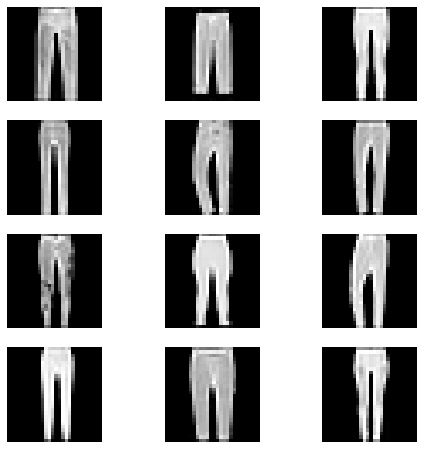

In [3]:
'''
b. Dataset Pre-processing
'''
# Normalize pixel values to the range [-1, 1]
ds1_jungyu['images'] = (ds1_jungyu['images'] / 127.5) - 1
ds2_jungyu['images'] = (ds2_jungyu['images'] / 127.5) - 1

# Print the shape of the normalized images in ds1_jungyu and ds2_jungyu
print("ds1_jungyu['images'] shape:", ds1_jungyu['images'].shape)
print("ds2_jungyu['images'] shape:", ds2_jungyu['images'].shape)

# Create a new dataset containing pants images (class label 1)
pants_images_ds1 = ds1_jungyu['images'][ds1_jungyu['labels'] == 1]
pants_images_ds2 = ds2_jungyu['images'][ds2_jungyu['labels'] == 1]
dataset_jungyu = np.concatenate([pants_images_ds1, pants_images_ds2])

# Print the shape of the concatenated dataset
print("dataset_jungyu shape:", dataset_jungyu.shape)

# Display the first 12 images in an 8x8 figure with 4x3 subplots
plt.figure(figsize=(8, 8))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    plt.imshow(dataset_jungyu[i], cmap='gray')
    plt.axis('off')  
plt.show()

# Create training dataset using TensorFlow's Dataset API
train_dataset_jungyu = tf.data.Dataset.from_tensor_slices(dataset_jungyu).shuffle(7000).batch(256)

In [4]:
'''
c. Build the Generator Model of the GAN
'''
def build_generator_model():
    model = tf.keras.Sequential(name="generator_model_jungyu")
    
    # Input layer: Vector with dimension size 100
    model.add(layers.Input(shape=(100,)))
    
    # 1st layer: Fully connected with 7*7*256 neurons, no bias term
    model.add(layers.Dense(7 * 7 * 256, use_bias=False))
    
    # Reshape the output to (7, 7, 256) for convolutional layers
    model.add(layers.Reshape((7, 7, 256)))
    
    # 2nd layer: Batch Normalization
    model.add(layers.BatchNormalization())
    
    # 3rd layer: Leaky ReLU activation
    model.add(layers.LeakyReLU())
    
    # 4th layer: Transposed Convolution with 128 filters, 5x5 kernel, stride 1x1, 'same' padding, no bias
    model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=1, padding='same', use_bias=False))
    
    # 5th layer: Batch Normalization
    model.add(layers.BatchNormalization())
    
    # 6th layer: Leaky ReLU activation
    model.add(layers.LeakyReLU())
    
    # 7th layer: Transposed Convolution with 64 filters, 5x5 kernel, stride 2x2, 'same' padding, no bias
    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', use_bias=False))
    
    # 8th layer: Batch Normalization
    model.add(layers.BatchNormalization())
    
    # 9th layer: Leaky ReLU activation
    model.add(layers.LeakyReLU())
    
    # 10th layer: Transposed Convolution with 1 filter, 5x5 kernel, stride 2x2, 'same' padding, tanh activation
    model.add(layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', use_bias=False, activation='tanh'))
    
    return model


generator_model_jungyu = build_generator_model()


generator_model_jungyu.summary()

Model: "generator_model_jungyu"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,281,792 (8.70 MB)

 Trainable params: 2,280,896 (8.70 MB)

 Non-trainable params: 896 (3.50 KB)

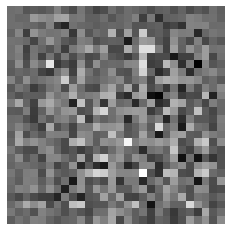

In [5]:
'''
d. Sample untrained generator
'''
# Create a sample vector with dimension size 100
sample_vector = tf.random.normal([1, 100])

# Generate an image from the untrained generator model, with training disabled
generated_image = generator_model_jungyu(sample_vector, training=False)

# Display the generated image
plt.imshow(generated_image[0, :, :, 0], cmap='gray')  # (1, height, width, 1) (batch_size, height, width, color_channels)
plt.axis('off')  
plt.show()

In [6]:
'''
e. Build the Discriminator Model of the GAN
'''
def build_discriminator_model():
    model = tf.keras.Sequential(name="discriminator_model_jungyu")
    
    # Input layer: Image input
    model.add(layers.Input(shape=(28, 28, 1)))  
    
    # 1st layer: Convolution with 64 filters, 5x5 kernel, stride 2x2, 'same' padding
    model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same'))
    
    # 2nd layer: Leaky ReLU activation
    model.add(layers.LeakyReLU())
    
    # 3rd layer: Dropout with rate of 0.3
    model.add(layers.Dropout(0.3))
    
    # 4th layer: Convolution with 128 filters, 5x5 kernel, stride 2x2, 'same' padding
    model.add(layers.Conv2D(128, kernel_size=5, strides=2, padding='same'))
    
    # 5th layer: Leaky ReLU activation
    model.add(layers.LeakyReLU())
    
    # 6th layer: Dropout with rate of 0.3
    model.add(layers.Dropout(0.3))
    
    # 7th layer: Transposed Convolution with 64 filters, 5x5 kernel, stride 2x2, 'same' padding, no bias
    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', use_bias=False))
    
    # 8th layer: Batch Normalization
    model.add(layers.BatchNormalization())
    
    # 9th layer: Leaky ReLU activation
    model.add(layers.LeakyReLU())
    
    # 11. Flatten the output
    model.add(layers.Flatten())
    
    # 12. Output layer with a single unit
    model.add(layers.Dense(1, activation='linear'))  

    return model


discriminator_model_jungyu = build_discriminator_model()
discriminator_model_jungyu.summary()

Model: "discriminator_model_jungyu"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,193 (1.62 MB)

 Trainable params: 424,065 (1.62 MB)

 Non-trainable params: 128 (512.00 B)

In [7]:
'''
f. Implement Training
'''
# Create a loss function for binary cross-entropy
cross_entropy_jungyu = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# create a generator and discriminator optimizer
generator_optimizer_jungyu = tf.keras.optimizers.Adam(name='generator_optimizer_jungyu')
discriminator_optimizer_jungyu = tf.keras.optimizers.Adam(name='discriminator_optimizer_jungyu')

# Create the training step function
@tf.function
def training_step(images):
    # Generate random noise, batch size 256, noise vector of size 100
    noise = tf.random.normal([256, 100])  

    # Record operations for automatic differentiation
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate images using the generator
        generated_images = generator_model_jungyu(noise, training=True)
        
        # Calculate the discriminator outputs for real and fake images
        real_output = discriminator_model_jungyu(images, training=True)
        fake_output = discriminator_model_jungyu(generated_images, training=True)
        
        # Calculate generator loss - goal is to trick the discriminator
        gen_loss = cross_entropy_jungyu(tf.ones_like(fake_output), fake_output)
        
        # Calculate discriminator loss
        real_loss = cross_entropy_jungyu(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy_jungyu(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss

    # Calculate gradients for both the generator and discriminator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model_jungyu.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model_jungyu.trainable_variables)

    # Apply gradients to update the generator and discriminator
    generator_optimizer_jungyu.apply_gradients(zip(gradients_of_generator, generator_model_jungyu.trainable_variables))
    discriminator_optimizer_jungyu.apply_gradients(zip(gradients_of_discriminator, discriminator_model_jungyu.trainable_variables))

In [8]:
'''
g. Train the GAN model
'''
epochs = 10

def train_gan(train_dataset, epochs):
    for epoch in range(epochs):
        start_time = time.time()  
        
        for image_batch in train_dataset:
            training_step(image_batch)  

        epoch_time = time.time() - start_time
        print(f"Time for epoch {epoch + 1} is {epoch_time:.2f} seconds")
        

train_gan(train_dataset_jungyu, epochs)

Time for epoch 1 is 20.14 seconds
Time for epoch 2 is 14.59 seconds
Time for epoch 3 is 14.82 seconds
Time for epoch 4 is 15.14 seconds
Time for epoch 5 is 17.08 seconds
Time for epoch 6 is 17.67 seconds
Time for epoch 7 is 17.76 seconds
Time for epoch 8 is 17.32 seconds
Time for epoch 9 is 16.83 seconds
Time for epoch 10 is 16.89 seconds


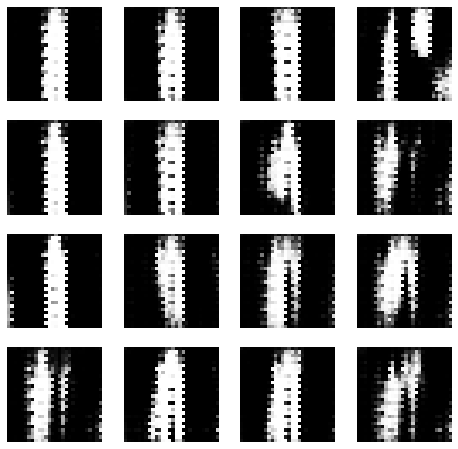

In [9]:
'''
h. Visualized Trained Generator
'''

# Create 16 sample vectors with dimension size 100
sample_vectors = tf.random.normal([16, 100])  # 16 samples, each with 100 dimensions

# Generate images from the trained generator (disable training)
generated_images = generator_model_jungyu(sample_vectors, training=False)

# Normalize the pixels to the range [0, 255]
generated_images = (generated_images * 127.5) + 127.5  # Scale to [0, 255]

# Display the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')  
    plt.axis('off')  
plt.show()